## 归一化标准化

In [1]:
from sklearn.preprocessing import MinMaxScaler

def test():
    # 1. 准备数据
    data = [[90, 2, 10, 40],
            [60, 4, 15, 45],
            [75, 3, 13, 46]]
    # 2.初始化归一化对象
    transformer = MinMaxScaler()
    # 3. 对原始特征数据进行归一化处理
    data = transformer.fit_transform(data)
    # 4. 打印归一化之后的结果
    print(data)

In [2]:
test()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]


In [3]:
from sklearn.preprocessing import StandardScaler

def test():
    # 1. 准备数据
    data = [[90, 2, 10, 40],
            [60, 4, 15, 45],
            [75, 3, 13, 46]]
    # 2.初始化标准化对象
    transformer = StandardScaler()
    # 3. 对原始特征数据进行标准化处理
    data = transformer.fit_transform(data)
    # 4. 打印标准化之后的结果
    print(data)

In [4]:
test()

[[ 1.22474487 -1.22474487 -1.29777137 -1.3970014 ]
 [-1.22474487  1.22474487  1.13554995  0.50800051]
 [ 0.          0.          0.16222142  0.88900089]]


## K近邻算法Sklearn API

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

if __name__ == '__main__':
    # 1. 加载数据集
    iris = load_iris()
    # 2. 数据标准化
    transformer = StandardScaler()
    x = transformer.fit_transform(iris.data)
    # 3. 模型训练
    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(x,iris.target)
    # 4. 利用模型进行预测
    result = estimator.predict(x)
    print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
iris = load_iris()
iris.data # 数据的特征
iris.target  # 数据的目标
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 数据集划分-留出法

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from collections import Counter
from sklearn.datasets import load_iris

def test01():
    # 加载数据集
    x,y = load_iris(return_X_y = True)
    print('随机类别分割',Counter(y))
# 留出法(随机分割)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    print('随机类别分割',Counter(y_train),Counter(y_test))
    # 留出法(分层分割)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)
    print('分层类别分割',Counter(y_train),Counter(y_test))

def test02():
    # 加载数据集
    x,y = load_iris(return_X_y = True)
    print('随机类别分割',Counter(y))
    # 留出法(随机分割)
    spliter = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for train,test in spliter.split(x,y):
        print('随机类别分割',Counter(y[test]))
    # 留出法(分层分割)
    spliter = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for train,test in spliter.split(x,y):
        print('分层分割',Counter(y[test]))

if __name__ == '__main__':
    test01()
    test02()

随机类别分割 Counter({0: 50, 1: 50, 2: 50})
随机类别分割 Counter({1: 43, 0: 40, 2: 37}) Counter({2: 13, 0: 10, 1: 7})
分层类别分割 Counter({1: 40, 0: 40, 2: 40}) Counter({0: 10, 2: 10, 1: 10})
随机类别分割 Counter({0: 50, 1: 50, 2: 50})
随机类别分割 Counter({1: 13, 0: 11, 2: 6})
随机类别分割 Counter({1: 12, 2: 10, 0: 8})
随机类别分割 Counter({1: 11, 0: 10, 2: 9})
随机类别分割 Counter({2: 14, 1: 9, 0: 7})
随机类别分割 Counter({2: 13, 0: 12, 1: 5})
分层分割 Counter({0: 10, 1: 10, 2: 10})
分层分割 Counter({2: 10, 0: 10, 1: 10})
分层分割 Counter({0: 10, 1: 10, 2: 10})
分层分割 Counter({1: 10, 2: 10, 0: 10})
分层分割 Counter({1: 10, 2: 10, 0: 10})


## 数据集划分-交叉验证

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.datasets import load_iris

def test():
    # 加载数据集
    x,y = load_iris(return_X_y = True)
    print('原始类别比例',Counter(y))
    # 随机交叉验证
    spliter = KFold(n_splits=5,shuffle=True,random_state=0)
    for train,test in spliter.split(x,y):
        print(test)
        print('随机交叉验证',Counter(y[test]))
    # 分层交叉验证
    spliter = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    for train,test in spliter.split(x,y):
        print('分层交叉验证',Counter(y[test]))
if __name__ == '__main__':
    test()

原始类别比例 Counter({0: 50, 1: 50, 2: 50})
[  7   8  16  22  24  26  33  37  40  44  45  51  54  62  63  66  71  73
  76  78  86  90  93  97 100 107 114 121 126 134]
随机交叉验证 Counter({1: 13, 0: 11, 2: 6})
[  2  10  18  27  43  50  56  59  60  61  69  80  83  84  92 106 108 112
 116 119 123 127 132 133 135 137 141 144 146 147]
随机交叉验证 Counter({2: 15, 1: 10, 0: 5})
[  3   6  11  12  13  15  20  30  46  48  52  64  68  85  89  91  94  95
  96  98 101 102 104 109 110 111 120 125 128 149]
随机交叉验证 Counter({0: 10, 1: 10, 2: 10})
[  0   1   4   5  17  23  28  31  32  34  35  38  41  42  53  55  57  65
  74  75 105 113 118 124 129 131 138 139 143 148]
随机交叉验证 Counter({0: 14, 2: 10, 1: 6})
[  9  14  19  21  25  29  36  39  47  49  58  67  70  72  77  79  81  82
  87  88  99 103 115 117 122 130 136 140 142 145]
随机交叉验证 Counter({1: 11, 0: 10, 2: 9})
分层交叉验证 Counter({0: 10, 1: 10, 2: 10})
分层交叉验证 Counter({0: 10, 1: 10, 2: 10})
分层交叉验证 Counter({0: 10, 1: 10, 2: 10})
分层交叉验证 Counter({0: 10, 1: 10, 2: 10})
分层交叉验证 Co

## 留一法

In [13]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.datasets import load_iris
from collections import Counter


def test01():
    x,y = load_iris(return_X_y = True)
    print('原始类别比例',Counter(y))

    # 留一法
    spliter = LeaveOneOut()
    for train, test in spliter.split(x,y):
        print('训练集:',len(train),'测试集:',len(test),test)
    spliter = LeavePOut(p=3)
    for train, test in spliter.split(x,y):
        print('训练集:',len(train),'测试集:',len(test),test)
if __name__ == '__main__':
    test01()

原始类别比例 Counter({0: 50, 1: 50, 2: 50})
训练集: 149 测试集: 1 [0]
训练集: 149 测试集: 1 [1]
训练集: 149 测试集: 1 [2]
训练集: 149 测试集: 1 [3]
训练集: 149 测试集: 1 [4]
训练集: 149 测试集: 1 [5]
训练集: 149 测试集: 1 [6]
训练集: 149 测试集: 1 [7]
训练集: 149 测试集: 1 [8]
训练集: 149 测试集: 1 [9]
训练集: 149 测试集: 1 [10]
训练集: 149 测试集: 1 [11]
训练集: 149 测试集: 1 [12]
训练集: 149 测试集: 1 [13]
训练集: 149 测试集: 1 [14]
训练集: 149 测试集: 1 [15]
训练集: 149 测试集: 1 [16]
训练集: 149 测试集: 1 [17]
训练集: 149 测试集: 1 [18]
训练集: 149 测试集: 1 [19]
训练集: 149 测试集: 1 [20]
训练集: 149 测试集: 1 [21]
训练集: 149 测试集: 1 [22]
训练集: 149 测试集: 1 [23]
训练集: 149 测试集: 1 [24]
训练集: 149 测试集: 1 [25]
训练集: 149 测试集: 1 [26]
训练集: 149 测试集: 1 [27]
训练集: 149 测试集: 1 [28]
训练集: 149 测试集: 1 [29]
训练集: 149 测试集: 1 [30]
训练集: 149 测试集: 1 [31]
训练集: 149 测试集: 1 [32]
训练集: 149 测试集: 1 [33]
训练集: 149 测试集: 1 [34]
训练集: 149 测试集: 1 [35]
训练集: 149 测试集: 1 [36]
训练集: 149 测试集: 1 [37]
训练集: 149 测试集: 1 [38]
训练集: 149 测试集: 1 [39]
训练集: 149 测试集: 1 [40]
训练集: 149 测试集: 1 [41]
训练集: 149 测试集: 1 [42]
训练集: 149 测试集: 1 [43]
训练集: 149 测试集: 1 [44]
训练集: 149 测试集: 1 [45]
训练集: 1

KeyboardInterrupt: 

## 自助法

In [23]:
import pandas as pd


if __name__ == '__main__':

    # 1. 构造数据集
    data = [[90, 2, 10, 40],
            [60, 4, 15, 45],
            [75, 3, 13, 46],
            [78, 2, 64, 22]]

    data = pd.DataFrame(data)
    print('数据集:\n',data)
    print('*' * 30)

    # 2. 产生训练集
    train = data.sample(frac=1,replace=True)
    print('训练集:',train)
    print('*' * 30)

    # 3. 产生测试集
    test = data.loc[data.index.difference(train.index)]
    print('测试集:',test)


数据集:
     0  1   2   3
0  90  2  10  40
1  60  4  15  45
2  75  3  13  46
3  78  2  64  22
******************************
训练集:     0  1   2   3
2  75  3  13  46
1  60  4  15  45
3  78  2  64  22
2  75  3  13  46
******************************
测试集:     0  1   2   3
0  90  2  10  40


## 分类模型评估方法

In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 加载数据
x,y = datasets.load_iris(return_X_y = True)
# 训练集测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# 创建KNN分类器对象,指定K个邻居
knn_estimator = KNeighborsClassifier(n_neighbors=6)
# 利用knn对象训练模型
knn_estimator.fit(x,y)
# 利用训练好的模型进行预测
y_predict = knn_estimator.predict(x_test)
# 对预测结果进行评估
print('预测结果准确率为:',sum(y_predict== y_test)/y_test.shape[0])

预测结果准确率为: 0.9666666666666667


In [39]:
print(y_predict)

[1 2 2 2 2 0 1 2 2 1 1 2 2 1 1 2 2 1 0 0 0 0 1 0 0 1 2 1 0 0]


In [40]:
print(y_test)

[1 2 2 2 2 0 1 2 2 1 1 2 2 1 2 2 2 1 0 0 0 0 1 0 0 1 2 1 0 0]


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.9666666666666667

In [42]:
knn_estimator.score(x_test,y_test)

0.9666666666666667

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
from collections import Counter

In [2]:
def show_digit(idx):
    data = pd.read_csv('data/手写数字识别.csv')
    if idx<0 or idx>len(data)-1:
        return
    x = data.iloc[:,1:]
    y = data.iloc[:,0]

    print('当前的数字标签是：',y[idx])

    data_ = x.iloc[idx].values
    data_ = data_.reshape(28,28)
    plt.axis('off')
    plt.imshow(data_)
    plt.show()

当前的数字标签是： 1


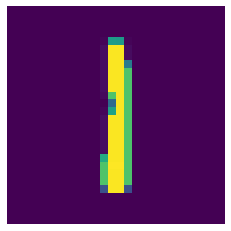

In [4]:
show_digit(2)

In [5]:
data = pd.read_csv('data/手写数字识别.csv')
x = data.iloc[:,1:]/255
y = data.iloc[:,0]

#打印数据的基本信息
print('数据基本信息：',x.shape)
print('数据类别比例：',Counter(y))

# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)
#模型训练
estimator = KNeighborsClassifier(n_neighbors=3)
estimator.fit(x_train,y_train)
# 模型评估
estimator.score(x_test,y_test)
# 模型保存
joblib.dump(estimator,'model/knn.pth')

数据基本信息： (42000, 784)
数据类别比例： Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


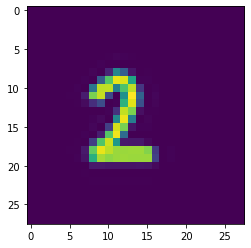

In [2]:
import matplotlib.pyplot as plt
img = plt.imread('temp/demo.png')
plt.imshow(img)

In [5]:
knn = joblib.load('model/knn.pth')
y_pred = knn.predict(img.reshape(1,-1))
y_pred

array([2])